In [1]:
# Imports, always run this cell
import numpy as np
import matplotlib.pyplot as plt
import copy as cp
import random as rnd

from functools import cmp_to_key
from scipy.spatial import cKDTree

In [2]:
# AUXILIARY PLOTTING FUNCTIONS

# Global plot style
plt.style.use('bmh')

def plotPoints(points, color='b', marker='o'):
    '''
    Plot points

    Note
    ----
    points is an np.array and MUST have shape (x, 2)
    where x is the amount of points
    '''

    # Adjust scale
    plt.axis('equal')

    xP = [p[0] for p in points]
    yP = [p[1] for p in points]

    plt.scatter(x=xP, y=yP, color=color, marker=marker)

def plotSegments(segments, color='b', marker='o', linestyle='-'):
    '''
    Plot line segments

    Note
    ----
    segments is an np.array and  MUST have shape (x, 2, 2)
    where x is the amount of segments
    '''

    # Adjust scale
    plt.axis('equal')

    for s in segments:
        xVal = [s[0][0], s[1][0]]
        yVal = [s[0][1], s[1][1]]

        plt.plot(xVal, yVal , color=color, marker=marker, linestyle=linestyle)

def plotConvexHull(allPoints, allSegments, color='b', marker='o', linestyle='-'):
    '''
    Plot convex hull, including
    inner points and convex polygon segments

    Note
    ----
    allPoints is an np.array and MUST have shape (x, 2)
    where x is the amount of points

    allSegments is an np.array and  MUST have shape (y, 2, 2)
    where y is the amount of segments
    '''

    # Plot both points and segments
    plotPoints(allPoints, color, marker)
    plotSegments(allSegments, color, marker, linestyle)

def plotLineFromEquation(slope, intercept, xp, yp, color='blue'):
    '''
    Plot line given equation and a point.
    Also draw y = ax + b around a point

    Parameters
    ----------
    slope: slope of the line
    intercept: y-intercept of the line
    xp, yp: coordinates of any point from given equation

    Note
    ----
    Slope cannot be zero
    '''

    # Adjust scale
    plt.axis('equal')

    plotPoints([np.array([xp, yp])], color=color) 

    plt.axline([xp, yp], slope=slope, color=color)
    
    plt.text(xp - 1, yp - 1, f"y = {slope:.3f}x {intercept:.3f}", color=color)

In [3]:
# AUXILIARY DATA STRUCTURES AND FUNCTIONS

# ======================================================= #
class Stack:
    def __init__(self):
        self.size = 0
        self.stack = []

    def push(self, obj):
        self.stack.append(obj)
        self.size += 1

    def pop(self):
        self.stack.pop()
        self.size -= 1

    def top(self):
        return self.stack[-1]

    def toList(self):
        return self.stack
    
    def len(self):
        return self.size
    
    def isEmpty(self):
        return self.size == 0

# ======================================================= #
def selectionSort(array, cmp, start, end):
    '''
    Sort an array in-place.

    Parameters
    ----------
    array: array to sort
    cmp: compare function
    start, end: start and end indexes, both inclusive

    Returns
    -------
    Sorted array
    '''

    for i in range(start, end):
        min = i
        
        for j in range(i + 1, end + 1):  
            if cmp(array[j], array[min]) == -1:
                min = j

        # Avoid swapping same element
        if min != i:
            array[i], array[min] = array[min], array[i]

    return array

# Threshold for using selection sort instead of quick sort
QS_THRESHOLD = 100

def quickSort(array, cmp, start, end):
    '''
    Sort an array in-place. Iterative implementation.
    Uses Selection Sort below a threshold for efficiency.

    Parameters
    ----------
    array: array to sort
    cmp: compare function
    start, end: start and end indexes, both inclusive

    Returns
    -------
    Sorted array
    '''

    # Iterative quicksort
    stack = Stack()
    stack.push((start, end))

    while stack.isEmpty() == False:
        # Get current partition
        (pStart, pEnd) = stack.top()
        stack.pop()

        # Use selection sort when below threshold
        if pEnd - pStart < QS_THRESHOLD:
            selectionSort(array, cmp, pStart, pEnd)
            continue
        
        i, j = pStart, pEnd
        pivot = cp.deepcopy(array[rnd.randint(pStart, pEnd)])

        # Main loop
        while i <= j:
            while cmp(pivot, array[i]) == 1:
                i += 1

            while cmp(pivot, array[j]) == -1:
                j -= 1

            # Swap [i] and [j]
            if i <= j:
                if i != j:
                    array[i], array[j] = array[j], array[i]

                i += 1
                j -= 1
        
        # Left partition
        if pStart < j:
            stack.push((pStart, j))

        # Right partition
        if i < pEnd:
            stack.push((i, pEnd))

    # Sorting happened in-place, but return anyways
    return array

# ======================================================= #
# BINARY TREE IMPLEMENTATION, SOURCE: 
# https://www.geeksforgeeks.org/deletion-in-binary-search-tree/

class Node:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None

class BST:
    def __init__(self, cmp):
        self.cmp = cmp
        self.root = None

    def inOrder(self):
        inOrderAUX(self.root)

    def insert(self, key):
        self.root = insertAUX(self.root, key, self.cmp)
    
    def delete(self, key):
        self.root = deleteAUX(self.root, key, self.cmp)

    def getBelowAbove(self, key):
        findPreSucAUX.pre = None
        findPreSucAUX.suc = None

        findPreSucAUX(self.root, key, self.cmp)

        below = findPreSucAUX.pre
        above = findPreSucAUX.suc

        return below, above
        
# A utility function to do inorder traversal of BST
def inOrderAUX(root):
    if root is not None:
        inOrderAUX(root.left)
        print(root.key, end=' ')
        inOrderAUX(root.right)
 
# A utility function to insert a new node with given key in BST
def insertAUX(node, key, cmp):
    # If the tree is empty, return a new node
    if node is None:
        return Node(key)
 
    # Otherwise, recur down the tree
    if cmp(key, node.key) < 0:
        node.left = insertAUX(node.left, key, cmp)
    else:
        node.right = insertAUX(node.right, key, cmp)
 
    # return the (unchanged) node pointer
    return node
 
# Given a binary search tree and a key, this function
# deletes the key and returns the new root
def deleteAUX(root, key, cmp):
    # Base case
    if root is None:
        return root
 
    # Recursive calls for ancestors of
    # node to be deleted
    if cmp(root.key, key) > 0:
        root.left = deleteAUX(root.left, key, cmp)
        return root
    elif cmp(root.key, key) < 0:
        root.right = deleteAUX(root.right, key, cmp)
        return root
 
    # We reach here when root is the node
    # to be deleted.
 
    # If one of the children is empty
    if root.left is None:
        temp = root.right
        del root
        return temp
    elif root.right is None:
        temp = root.left
        del root
        return temp
 
    # If both children exist
    else:
        succParent = root
 
        # Find successor
        succ = root.right
        while succ.left is not None:
            succParent = succ
            succ = succ.left
 
        # Delete successor.  Since successor
        # is always left child of its parent
        # we can safely make successor's right
        # right child as left of its parent.
        # If there is no succ, then assign
        # succ.right to succParent.right
        if succParent != root:
            succParent.left = succ.right
        else:
            succParent.right = succ.right
 
        # Copy Successor Data to root
        root.key = succ.key
 
        # Delete Successor and return root
        del succ
        return root

def findPreSucAUX(root, key, cmp):
    # Base Case
    if root is None:
        return
 
    # If key is present at root
    if cmp(root.key, key) == 0:
 
        # the maximum value in left subtree is predecessor
        if root.left is not None:
            tmp = root.left 
            while(tmp.right):
                tmp = tmp.right 
            findPreSucAUX.pre = tmp 
 
        # the minimum value in right subtree is successor
        if root.right is not None:
            tmp = root.right
            while(tmp.left):
                tmp = tmp.left 
            findPreSucAUX.suc = tmp 
 
        return
 
    # If key is smaller than root's key, go to left subtree
    if cmp(root.key, key) > 0:
        findPreSucAUX.suc = root 
        findPreSucAUX(root.left, key, cmp)
 
    else: # go to right subtree
        findPreSucAUX.pre = root
        findPreSucAUX(root.right, key, cmp)

In [4]:
# BASIC GEOMETRY FUNCTIONS

def getOrientation(origin, a, b):
    '''
    Get orientation between two vectors in 2D space.

    Parameters
    ----------
    origin: common point between vectors
    a: vector a
    b: vector b

    Returns
    -------
    1: a is clockwise of b
    -1: a is anti-clockwise of b
    0: a and b are colinear
    '''

    # Offset common origin from a and b
    # This way a and b are vectors with origin at (0, 0)
    A = a - origin
    B = b - origin

    return np.sign(A[0] * B[1] - (A[1] * B[0]))

def getDirection(p0, p1, p2):
    '''
    Get turn direction between three consecutive points

    Parameters
    ----------
    p0, p1, p2: consecutive points as in p0 -> p1 -> p2

    Returns
    -------
    1: going from p0 to p2 makes a right turn
    -1: going from p0 to p2 makes a left turn
    0: there's no change of direction

    Note
    ----
    Points must have x and y coordinates
    '''

    return getOrientation(p0, p2, p1)

# Constants for readability
TURN_LEFT  = ANTI_CLOCKWISE = -1
TURN_RIGHT = CLOCKWISE      = 1
NO_CHANGE  = COLINEAR       = 0

In [5]:
# BASIC LINE GEOMETRY

def isOnSegment(start, end, p) -> bool: 
    '''
    Check if point p is on segment [start <-> end]

    Parameters
    ----------
    start, end, p. Start and end are the limits of a segment, and p is a point

    Returns
    -------
    True - p is on segment [start, end]
    False - p is not on segment [start, end]

    Note
    ----
    Points must have x and y coordinates
    '''
    pIsBetweenStartEnd_ifAscending = p[1] >= start[1] and p[1] <= end[1] and p[0] >= start[0] and p[0] <= end[0]
    pIsBetweenStartEnd_ifDescending = p[1] <= start[1] and p[1] >= end[1] and p[0] <= start[0] and p[0] >= end[0]
    
    if (pIsBetweenStartEnd_ifAscending or pIsBetweenStartEnd_ifDescending):
        return True

    return False


def hasIntersection(A, B, ignoreSamePoint=False, epsilon=1e-6) -> bool:
    '''
    Check intersection between 2 line segments

    Parameters
    ----------
    A, B: segments A and B each as an np.array of shape (2, 2)

    Returns
    -------
    True - There is an intersection
    False - There is not

    Note
    ----
    Segments must have 2 points with x and y coordinates each
    '''

    Astart, Aend, Bstart, Bend = A[0], A[1], B[0], B[1]

    # Edge case for convex hull, ignore intersections when endpoints are roughly the same
    if ignoreSamePoint:
        SS = np.allclose(Astart, Bstart, atol=epsilon, rtol=epsilon)
        SE = np.allclose(Astart, Bend,   atol=epsilon, rtol=epsilon)
        ES = np.allclose(Aend,   Bstart, atol=epsilon, rtol=epsilon)
        EE = np.allclose(Aend,   Bend,   atol=epsilon, rtol=epsilon)

        if SS or SE or ES or EE:
            return False

    # Vanilla steps
    direction1 = getDirection(Astart, Aend, Bstart)
    direction2 = getDirection(Astart, Aend, Bend)
    direction3 = getDirection(Bstart, Bend, Astart)
    direction4 = getDirection(Bstart, Bend, Aend)

    BisBetweenA = (direction3 > 0 and direction4 < 0) or (direction3 < 0 and direction4 > 0)
    AisBetweenB = (direction1 > 0 and direction2 < 0) or (direction1 < 0 and direction2 > 0)

    if (BisBetweenA and AisBetweenB):
        return True
    elif (direction1 == 0):
        return isOnSegment(Astart, Aend, Bstart)
    elif (direction2 == 0):
        return isOnSegment(Astart, Aend, Bend)
    elif (direction3 == 0):
        return isOnSegment(Bstart, Bend, Astart)
    elif (direction4 == 0):
        return isOnSegment(Bstart, Bend, Aend)
    
    return False

In [6]:
# GRAHAM SCAN IMPLEMENTATION

# Global for anchor value used by compare
global CURRENT_ANCHOR

def grahamCompare(a, b):
    # A compare function returns:
    # >= 1  if A is greater than B
    # <= -1 if A is smaller than B
    # 0  if they are equal

    ori = getOrientation(CURRENT_ANCHOR, a, b)

    # A is "smaller" than B, closer to anchor
    if   ori == CLOCKWISE:
        return -1
    elif ori == COLINEAR:
        # if colinear, choose furthest point
        distA = np.linalg.norm(CURRENT_ANCHOR - a)
        distB = np.linalg.norm(CURRENT_ANCHOR - b)

        if distA > distB:
            return -1 # A is furthest
        elif distA == distB:
            return 0  # Equal distance
        else:
            return 1  # B is furthest 
    
    # A is "greater" than B, further from anchor
    else:    
        return 1
    
def toSegments(hull: list) -> list:
    segList = []

    for i in range(len(hull) - 1):
        p0 = hull[i]
        p1 = hull[i+1]

        segment = np.array([[p0[0], p0[1]], [p1[0], p1[1]]])
        segList.append(segment)

    # Connect end to start
    p0 = hull[-1]
    p1 = hull[0]

    segment = np.array([[p0[0], p0[1]], [p1[0], p1[1]]])
    segList.append(segment)

    return segList

def getAnchorIdx(array: list, epsilon=1e-6) -> int:
    anchorIdx = 0

    # Find southwest-most point
    for i in range(len(array)):
        # If there's a tie, choose point with smallest X
        if abs(array[i][1] - array[anchorIdx][1]) < epsilon:
            if (array[i][0] < array[anchorIdx][0]):
                anchorIdx = i

        # Look for point with smallest Y
        elif array[i][1] < array[anchorIdx][1]:
            anchorIdx = i
    
    return anchorIdx

def grahamScan(array: list) -> list:
    size = len(array)

    # Find anchor
    anchorIdx = getAnchorIdx(array)
    
    # Put anchor at the start
    array[0], array[anchorIdx] = array[anchorIdx], array[0]

    # Set anchor used for compare
    global CURRENT_ANCHOR; CURRENT_ANCHOR = array[0]
    
    # Sort in relation to anchor
    quickSort(array, grahamCompare, 1, size - 1)
    #array[1:].sort(key=cmp_to_key(compare)) # Does not work, key function gets wild
    
    # Init points (first 3 always included)
    hull = [array[0], array[1], array[2]]

    # Skip if there's only three points
    if (size > 3):
        for i in range(3, size):
            while (getDirection(hull[-2], hull[-1], array[i]) == TURN_RIGHT):
                hull.pop()

            hull.append(array[i]) 

    # Convert hull points to segments
    # Adding points for consecutive segments and connecting last to start
    return toSegments(hull), hull

In [7]:
# LINEAR SWEEPING IMPLEMENTATION

class Endpoint:
    def __init__(self, p, pos, seg):
        self.p = p
        self.pos = pos
        self.seg = seg

# Transform segments for comparison
def segmentsToEndpoints(segments):
    endpoints = []

    for seg in segments:
        # First point is to the left 
        if (seg[0][0] < seg[1][0]):
            endpoints.append(Endpoint(seg[0], 'l', seg))
            endpoints.append(Endpoint(seg[1], 'r', seg))
        # First point is to the right 
        else:
            endpoints.append(Endpoint(seg[0], 'r', seg))
            endpoints.append(Endpoint(seg[1], 'l', seg))
    
    return endpoints

# Compare segments for binary tree
def segmentCompare(a, b, epsilon=1e-6):
    # First y coordinate
    diff = a[0][1] - b[0][1]

    if abs(diff) > epsilon:
        return np.sign(diff)
    
    # Second y coordinate
    diff = a[1][1] - b[1][1]

    if abs(diff) > epsilon:
        return np.sign(diff)

    return 0
    
# Compare endpoints for sorting
def endpointCompare(a, b, epsilon=1e-6):
    # Order by x coordinate of point
    diff = a.p[0] - b.p[0]

    # Different x coordinate:
    # Leftmost points first
    if abs(diff) > epsilon:
        return np.sign(diff)
    
    # 1st tiebreaker: Same x coordinate
    # Left endpoints first
    # Naturally 'l' - 'r' gives a negative number
    diff = ord(a.pos) - ord(b.pos)
    
    if diff != 0:
        return diff

    # 2nd tiebreaker: Same x coordinate and same position
    # Lower y coordinates first
    diff = a.p[1] - b.p[1]

    if abs(diff) > epsilon:
        return np.sign(diff)

    # Else they are equal (unlikely)
    return 0

def linearSweeping(segments: list, ignoreSamePoint=False) -> bool:
    # Forward flag for hasIntersection
    flag = ignoreSamePoint

    # Get points and position (left or right)
    endpoints = segmentsToEndpoints(segments)

    # Sort endpoints  
    endpoints.sort(key=cmp_to_key(endpointCompare))

    # Init tree
    tree = BST(cmp=segmentCompare)

    # Main loop
    for e in endpoints:
        position, S = e.pos, e.seg

        # Left endpoint
        if position == 'l':
            tree.insert(S)

            B, A = tree.getBelowAbove(S)

            if (A != None and hasIntersection(A.key, S, flag)) \
            or (B != None and hasIntersection(B.key, S, flag)):
                return True
           
        # Right endpoint
        if position == 'r':
            B, A = tree.getBelowAbove(S)

            if (A != None and B != None and hasIntersection(A.key, B.key, flag)):
                return True

            tree.delete(S)

    return False

In [8]:
# FIND PERPENDICULAR LINE IMPLEMENTATION

def findPerpendicularLineEq(segment) -> (int, int, int, int):
    # Find segment line equation
    p0 = segment[0]
    p1 = segment[1]

    slope = (p0[1] - p1[1]) / (p0[0] - p1[0])
    intercept = p0[1] - slope * p0[0]

    # Calculate cartesian distance
    w = p0 - p1

    # Find middle point
    xMiddle = p1[0] + w[0] * 0.5
    yMiddle = p1[1] + w[1] * 0.5

    # New slope for perpendicular
    slope = -1 / slope
    
    # New intercept for perpendicular
    intercept = yMiddle - slope * xMiddle 

    return slope, intercept, xMiddle, yMiddle

In [9]:
# FIND CLOSEST POINTS IMPLEMENTATION

def findClosestPointsBetweenTwoConvexHulls(hull1, hull2):
    '''
    Important !!!! = Verify before if the convex hulls have intersection

    Find the closests points between two convex hulls.
    This is necessary to separate the convex hulls with a perpendicular segment

    Return: np.array of shape (2, 2) with segment formed by points
    '''

    closestPointToHull1 = 0
    closestPointToHull2 = 0
    
    # Get min points idx
    _, minsIdxHull1 = cKDTree(hull1).query(hull2, k=[1], workers=-1)
    _, minsIdxHull2 = cKDTree(hull2).query(hull1, k=[1], workers=-1)

    # Save min points
    closestPointToHull1 = hull2[minsIdxHull2[-1][0]]
    closestPointToHull2 = hull1[minsIdxHull1[-1][0]]

    #lessDist1_2 = np.inf

    #for i in hull1:
     #   for j in hull2:
      #      distA = np.linalg.norm(i - j)
       #     if distA < lessDist1_2:
        #        lessDist1_2 = distA
         #       closestPointToHull1 = j
          #      closestPointToHull2 = i 
                
    return np.array([closestPointToHull2, closestPointToHull1])

Running for 120 points


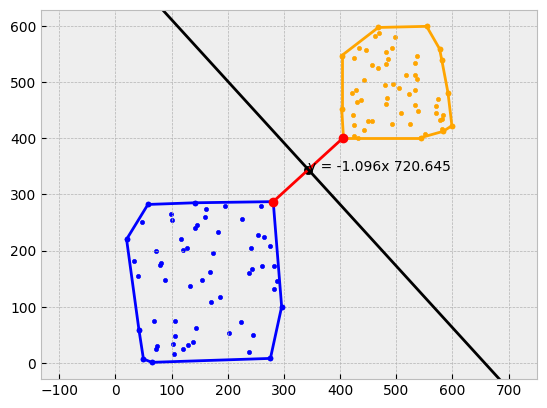

In [19]:
# Find closest vertices in two convex hull and trace a perpendicular segment

#data1 = [np.array([1,2]), np.array([3,4]), np.array([6,5]), np.array([2,1])]
#data2 = [np.array([6,7]), np.array([8,8]), np.array([7,9]), np.array([9,9])]

AMOUNT = 60
data1, data2 = [], []

print("Running for", AMOUNT*2, "points")

for i in range(AMOUNT):
    p1 = np.random.randint(low=1, high=300, size=2)
    p2 = np.random.randint(low=400, high=600, size=2)

    data1.append(p1)
    data2.append(p2)

hull1Seg, hull1 = grahamScan(data1)
hull2Seg, hull2 = grahamScan(data2)

plotConvexHull(data1, hull1Seg, marker='.')
plotConvexHull(data2, hull2Seg, color='orange', marker='.')

linearSweeping(hull1Seg + hull2Seg, True)

segClosest = findClosestPointsBetweenTwoConvexHulls(hull1, hull2)

plotSegments([segClosest], color='red') # current segments

slope, intercept, xMiddle, yMiddle = findPerpendicularLineEq(segClosest)

plotLineFromEquation(slope, intercept, xMiddle, yMiddle, color='black')


In [ ]:
# classificate point if are above or below the perpendicular segment between convex hulls
# this is important to mark points with labels according to this result

def checkPointInModel(p, segmentSlope, segmentIntercept):
    
    segmentYWhenX0 = segmentSlope * 0 + segmentIntercept
    segmentYWhenX1 = segmentSlope * 1 + segmentIntercept

    vectorX0Y = np.array([0, segmentYWhenX0])
    vectorX1Y = np.array([1, segmentYWhenX1])

    orientation = getOrientation(vectorX0Y, p, vectorX1Y)

    return orientation

def addLabelToNewPoin(p, segmentSlope, segmentIntercept):

    orientation = checkPointInModel (p, segmentSlope, segmentIntercept)

    if (orientation == CLOCKWISE):
        return "Point is BELOW the perpendicular segment"
    elif (orientation == ANTI_CLOCKWISE):
        return "Point is ABOVE the perpendicular segment"
    else:
        return "Point is IN the perpendicular segment"


print (checkPointInModel(np.array([10.5, 12.0]), -0.5, 17.25))

True


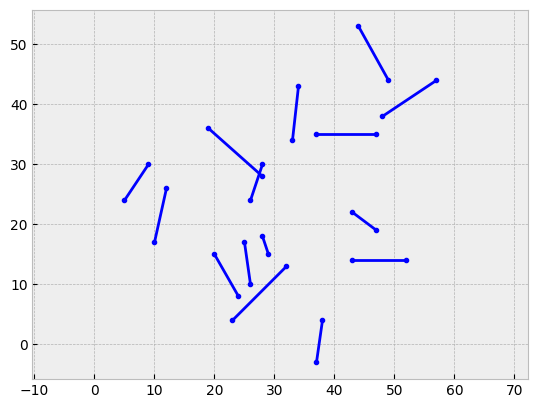

In [12]:
# Multiple segments test

AMOUNT = 15
data = []

# Generate random segments
for i in range(AMOUNT):
    x = np.random.randint(low=1, high=50)
    y = np.random.randint(low=1, high=50)
    dev1 = np.random.randint(low=-10, high=10)
    dev2 = np.random.randint(low=-10, high=10)

    p0 = np.array([x, y])
    p1 = np.array([x + dev1, y + dev2])

    segment = np.array([p0, p1])
    data.append(segment)

# Plot and test
plotSegments(data, marker='.')

print(linearSweeping(data))

In [ ]:
# Test suite data
# TODO: Convert this to list, otherwise sorting won't work
collection1 = np.array([[9,  3], [5, 13], [8, 19], [8, 16], [6,  3], [8, 15], [4,  8], [12 ,13]])
collection2 = np.array([[5,  7], [4, 2], [8, 19], [8, 4], [6,  3], [13, 7], [4,  11], [12 ,13]])

collection1Sorted = np.array([[6, 3], [9, 3], [12, 13], [8, 15], [8, 16], [8, 19], [5, 13], [4, 8]])
collection2Sorted = np.array([[4, 2], [8,  4], [6,  3], [13,  7], [12, 13], [8, 19], [5,  7], [4, 11]])

p = np.array([[2, 2], [5, 7], [8, 5], [3, 3], [5, 5]])

fill = 28

# Test suite functions
def testOrientation():
    print("Vector orientation: ".ljust(fill, ' '), end="")

    r1 = getOrientation(p[1], p[0], p[2])
    r2 = getOrientation(p[1], p[2], p[0])
    r3 = getOrientation(p[4], p[0], p[3])

    if (r1 == 1 and r2 == -1 and r3 == 0):
        print("PASSED")
    else:
        print("FAILED")

def testDirection():
    print("Turn direction: ".ljust(fill, ' '), end="")

    r1 = getDirection(p[0], p[1], p[2])
    r2 = getDirection(p[0], p[2], p[1])
    r3 = getDirection(p[0], p[4], p[3])

    if (r1 == 1 and r2 == -1 and r3 == 0):
        print("PASSED")
    else:
        print("FAILED")

def testAnchor():
    print("Get anchor index: ".ljust(fill, ' '), end="")

    r1 = getAnchorIdx(collection1)
    r2 = getAnchorIdx(collection2)

    if (r1 == 4 and r2 == 1):
        print("PASSED")
    else:
        print("FAILED")

def testAnchorSorting():
    print("Sort points given anchor: ".ljust(fill, ' '), end="")

    r1 = getAnchorIdx(collection1)
    r2 = getAnchorIdx(collection2)

    # Put anchor at the start
    tmp1            = cp.deepcopy(collection1[0])
    collection1[0]  = cp.deepcopy(collection1[r1])
    collection1[r1] = tmp1

    tmp2            = cp.deepcopy(collection2[0])
    collection2[0]  = cp.deepcopy(collection2[r2])
    collection2[r2] = tmp2

    # Sort
    global CURRENT_ANCHOR; 

    CURRENT_ANCHOR = collection1[0]
    quickSort(collection1, grahamCompare, 1, np.shape(collection1)[0] - 1)

    CURRENT_ANCHOR = collection1[1]
    quickSort(collection2, grahamCompare, 1, np.shape(collection2)[0] - 1)

    # Check
    if np.array_equal(collection1, collection1Sorted) and \
       np.array_equal(collection2, collection2Sorted):
        print("PASSED")
    else:
        print("FAILED")

def testGrahamScan():
    # TODO i'm tired today, bye
    
    return

def testHasIntersect():
    """ print("Has intersection: ".ljust(fill, ' '), end="")

    arrayWithInterceptionObvious = np.array([[1,1], [3,3], [2,1], [2,3]])
    s1, s2, s3, s4 = arrayWithInterceptionObvious
    res1 = (hasIntersection(s1, s2, s3, s4))

    arrayWithInterceptionInOnePoint = np.array([[1,1], [3,3], [3,3], [5,5]])
    s1, s2, s3, s4 = arrayWithInterceptionInOnePoint
    res2 = (hasIntersection(s1, s2, s3, s4))

    arrayInTheSameLineButNoInterception = np.array([[1,1], [3,3], [4,4], [5,5]])
    s1, s2, s3, s4 = arrayInTheSameLineButNoInterception
    res3 = (hasIntersection(s1, s2, s3, s4))

    arrayWithnoInterception = np.array([[1,1], [3,3], [10,5], [9,8]])
    s1, s2, s3, s4 = arrayWithnoInterception
    res4 = (hasIntersection(s1, s2, s3, s4))

    if (res1 and res2 and (not res3) and (not res4)):
        print("PASSED")
    else:
        print("FAILED") """

def testCheckPointInModelAndAddLabel():
    print("Check point model: ".ljust(fill, ' '), end="")
    # using easy segment -> y = 1 x + 3
    slope = 1
    intercept = 3

    pointAbove = np.array([0, 50])
    res1 = checkPointInModel(pointAbove, slope, intercept)

    pointBelow = np.array([0, -50])
    res2 = checkPointInModel(pointBelow, slope, intercept)

    pointInLine = np.array([2, 5])
    res3 = checkPointInModel(pointInLine, slope, intercept)

    if (res1 == ANTI_CLOCKWISE and res2 == CLOCKWISE and res3 == COLINEAR):
        print ("PASSED")
    else:
        print ("FAILED")

def testAll():
    testOrientation()
    testDirection()
    testAnchor()
    testAnchorSorting()
    testHasIntersect()
    testGrahamScan()
    testCheckPointInModelAndAddLabel()

# Run tests
testAll()